<a href="https://colab.research.google.com/github/Darshini-A/Data-Science-2/blob/main/Prac_7_DSII_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Q7.Will the patient survive for at least one year after a heart attack Use Classification Models Use the data set echocardiogram.data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif


In [8]:
# Load the dataset
column_names = ['survival', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion','fractional-shortening', 'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult', 'name', 'group', 'alive-at-1']
df = pd.read_csv('/content/echocardiogram.data.txt', names=column_names, na_values='?', error_bad_lines=False)

<ipython-input-8-d751be2d21fc>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/echocardiogram.data.txt', names=column_names, na_values='?', error_bad_lines=False)
Skipping line 50: expected 13 fields, saw 14



In [9]:
df.head()


,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11.0,0,71.0,0,0.260,9.000,4.600,14.0,1.00,1.000,name,1.0,0.0
1,19.0,0,72.0,0,0.380,6.000,4.100,14.0,1.70,0.588,name,1.0,0.0
2,16.0,0,55.0,0,0.260,4.000,3.420,14.0,1.00,1.000,name,1.0,0.0
3,57.0,0,60.0,0,0.253,12.062,4.603,16.0,1.45,0.788,name,1.0,0.0
4,19.0,1,57.0,0,0.160,22.000,5.750,18.0,2.25,0.571,name,1.0,0.0


In [10]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               130 non-null    float64
 1   still-alive            131 non-null    int64  
 2   age-at-heart-attack    126 non-null    float64
 3   pericardial-effusion   131 non-null    int64  
 4   fractional-shortening  124 non-null    float64
 5   epss                   117 non-null    float64
 6   lvdd                   121 non-null    float64
 7   wall-motion-score      128 non-null    float64
 8   wall-motion-index      130 non-null    float64
 9   mult                   128 non-null    float64
 10  name                   131 non-null    object 
 11  group                  109 non-null    float64
 12  alive-at-1             74 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 13.4+ KB


""


In [11]:
pd.DataFrame(df.describe())

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,group,alive-at-1
count,130.000000,131.000000,126.000000,131.000000,124.000000,117.000000,121.000000,128.000000,130.00000,128.000000,109.000000,74.000000
mean,22.182923,0.328244,62.813722,0.183206,0.216734,12.164769,4.763157,14.438125,1.37800,0.776719,1.779817,0.324324
std,15.858267,0.471377,8.342110,0.388320,0.107513,7.370159,0.810013,5.018566,0.45185,0.199078,0.416284,0.471317
min,0.030000,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.140000,1.000000,0.000000
25%,7.875000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.713000,2.000000,0.000000
50%,23.500000,0.000000,62.000000,0.000000,0.205000,11.000000,4.650000,14.000000,1.21600,0.786000,2.000000,0.000000
75%,33.000000,1.000000,67.750000,0.000000,0.270000,16.100000,5.300000,16.500000,1.50750,0.857000,2.000000,1.000000
max,57.000000,1.000000,86.000000,1.000000,0.610000,40.000000,6.780000,39.000000,3.00000,2.000000,2.000000,1.000000


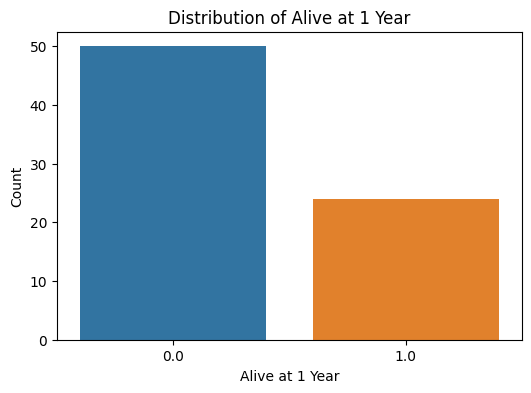

In [12]:
# Visualize the distribution of the target variable ('alive-at-1')
plt.figure(figsize=(6, 4))
sns.countplot(x='alive-at-1', data=df)
plt.title('Distribution of Alive at 1 Year')
plt.xlabel('Alive at 1 Year')
plt.ylabel('Count')
plt.show()

In [13]:
# Feature Engineering
# Handle missing values
df = df.dropna(subset=['alive-at-1'])

In [14]:
# Handling Categorical Feature 'still-alive'
le_still_alive = LabelEncoder()
df['still-alive'] = le_still_alive.fit_transform(df['still-alive'])

In [15]:
# Separate features and target
X = df[['age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult']]
y = df['alive-at-1']

In [16]:
# Impute missing values in features
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [17]:
# Feature Selection
selector = SelectKBest(f_classif, k='all')
X_selected = selector.fit_transform(X_imputed, y)

In [18]:
# Display the selected features
selected_features = [feature for feature, selected in zip(X.columns, selector.get_support()) if selected]
print("Selected Features:", selected_features)


Selected Features: ['age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult']


In [19]:
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [20]:
# Classification Model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
 # Make predictions on the testing set
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        10
         1.0       0.67      0.40      0.50         5

    accuracy                           0.73        15
   macro avg       0.71      0.65      0.66        15
weighted avg       0.72      0.73      0.71        15

Accuracy: 0.7333333333333333
